# Explore `taskmaster-1`

In [1]:
import json
from plotnine import *
import pandas as pd
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

data_path= 'data/taskmaster1/'

In [2]:
# #process data
# with open(f'{data_path}woz-dialogs.json','r') as f:
#     self_dialogs = json.load(f)
# self_dfs = []
# for i in tqdm_notebook(range(len(self_dialogs))):
#     if len(self_dialogs[i]['utterances'])> 0:
#         self_df = pd.DataFrame(self_dialogs[i]['utterances'])
#         self_df['conversation_id'] = self_dialogs[i]['conversation_id']
#         self_df['instruction_id'] = self_dialogs[i]['instruction_id']
#         self_df = self_df[['conversation_id','instruction_id','index','speaker','text']]
#         self_df['nb_token'] = self_df.text.map(lambda x: len(x.split()))
#         self_df['nb_char'] = self_df.text.map(lambda x: len(x))
#         self_dfs.append(self_df)
# self_df = pd.concat(self_dfs)
# self_df.to_csv(f'{data_path}self_df.csv',index=False)

In [3]:
self_df = pd.read_csv(f'{data_path}self_df.csv')
self_df['conversation_type'] = 'self'
oz_df = pd.read_csv(f'{data_path}oz_df.csv')
oz_df['conversation_type'] = 'oz'
all_df = pd.concat([self_df,oz_df],0).reset_index(drop=True)

In [4]:
#number of conversations
all_df.groupby(['conversation_type']).conversation_id.apply(lambda x: len(set(x)))

conversation_type
oz      5498
self    7708
Name: conversation_id, dtype: int64

In [5]:
#number of utterances
all_df.conversation_type.value_counts()

self    169469
oz      132407
Name: conversation_type, dtype: int64

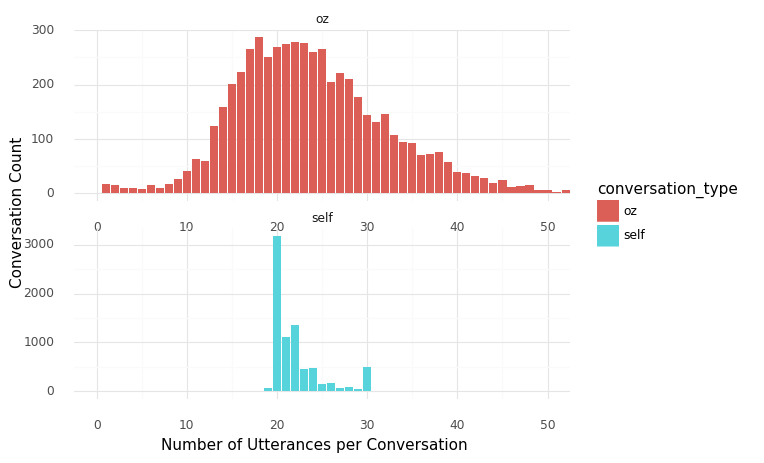

<ggplot: (311280574)>

In [6]:
#utterances per conversation
utter_df = all_df[['conversation_type','conversation_id','text']]\
    .groupby(['conversation_type','conversation_id'])\
    .count().reset_index()\
    .groupby(['conversation_type','text']).count().reset_index()
utter_df.columns = ['conversation_type','utterances','nb_conversations']
g = (ggplot(utter_df,aes(x='utterances',y='nb_conversations',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,50]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Utterances per Conversation') + ylab('Conversation Count'))
g

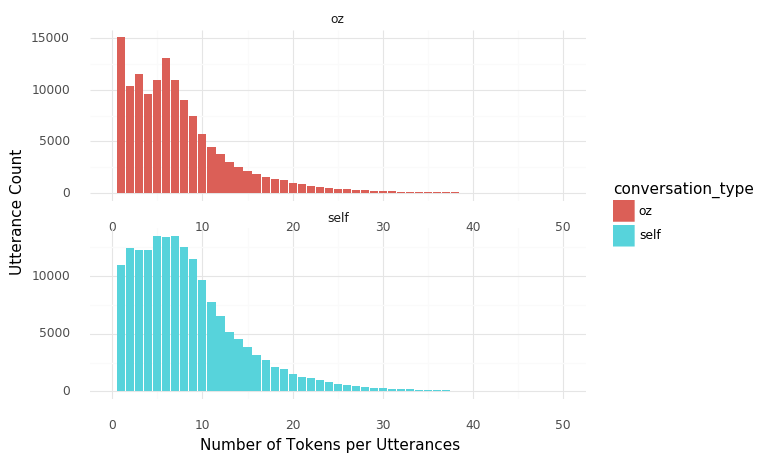

<ggplot: (311769513)>

In [7]:
#number of tokens
token_df = all_df[['conversation_type','nb_token','text']].groupby(['conversation_type','nb_token'])\
    .count().reset_index()
token_df.columns = ['conversation_type','nb_token','nb_utterances']
g = (ggplot(token_df,aes(x='nb_token',y='nb_utterances',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,50]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Tokens per Utterances') + ylab('Utterance Count'))
g

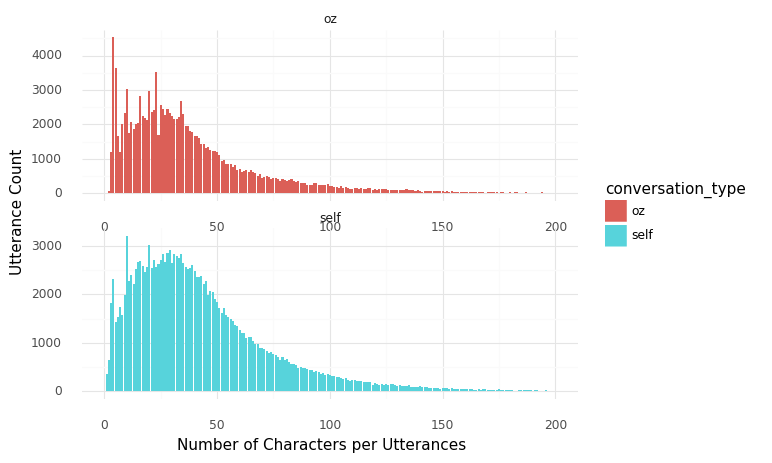

<ggplot: (-9223372036542705404)>

In [8]:
#number of characters
char_df = all_df[['conversation_type','nb_char','text']].groupby(['conversation_type','nb_char'])\
    .count().reset_index()
char_df.columns = ['conversation_type','nb_char','nb_utterances']
g = (ggplot(char_df,aes(x='nb_char',y='nb_utterances',fill='conversation_type')) + 
    geom_col() + theme_minimal() + coord_cartesian(xlim=[0,200]) +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Number of Characters per Utterances') + ylab('Utterance Count'))
g

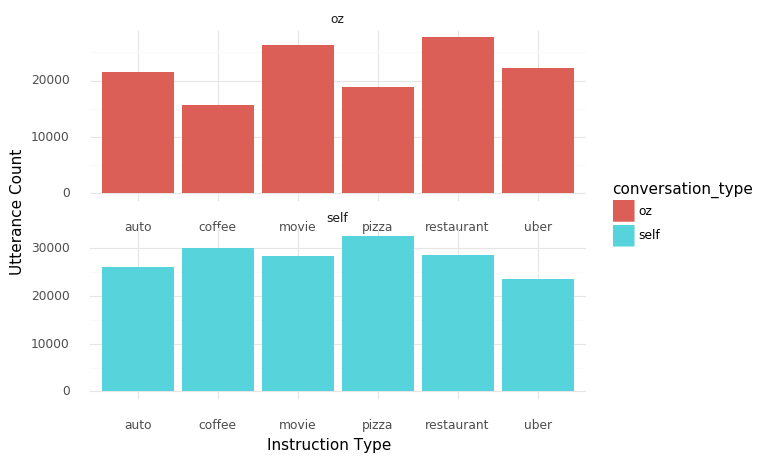

<ggplot: (319468138)>

In [9]:
#instruction type
all_df['instruction_type'] = all_df.instruction_id.map(lambda x: x.split('-')[0])
instruct_df = all_df[['conversation_type','instruction_type','text']]\
    .groupby(['conversation_type','instruction_type']).count().reset_index()

g = (ggplot(instruct_df,aes(x='instruction_type',y='text',fill='conversation_type')) + 
    geom_col() + theme_minimal() +
    facet_wrap('~conversation_type',ncol=1,scales='free') +
    xlab('Instruction Type') + ylab('Utterance Count'))
g

In [11]:
all_df.head()

,conversation_id,instruction_id,index,speaker,text,nb_token,nb_char,conversation_type,instruction_type,text_lower
0,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,0,USER,"Hi, I'm looking to book a table for Korean fod.",10,47,self,restaurant,"hi, i'm looking to book a table for korean fod."
1,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,1,ASSISTANT,"Ok, what area are you thinking about?",7,37,self,restaurant,"ok, what area are you thinking about?"
2,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,2,USER,"Somewhere in Southern NYC, maybe the East Vill...",8,50,self,restaurant,"somewhere in southern nyc, maybe the east vill..."
3,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,3,ASSISTANT,"Ok, great. There's Thursday Kitchen, it has g...",9,59,self,restaurant,"ok, great. there's thursday kitchen, it has g..."
4,dlg-00055f4e-4a46-48bf-8d99-4e477663eb23,restaurant-table-2,4,USER,That's great. So I need a table for tonight at...,28,125,self,restaurant,that's great. so i need a table for tonight at...


In [19]:
#duplicate utterances
all_df['text_lower'] = all_df.text.map(lambda x: str(x).lower())
dup_df = all_df[['text','text_lower','nb_token','conversation_type']]\
    .groupby(['text_lower','nb_token']).agg({'text':max,'conversation_type':len}).reset_index()
print(dup_df.shape)
dup_df.sort_values('conversation_type',ascending=False).head(20)

(208673, 4)


,text_lower,nb_token,text,conversation_type
201186,yes.,1,yes.,3988
154763,thank you.,2,thank you.,2278
132198,okay.,1,okay.,2215
48817,"hi, how can i help you?",6,"hi, how can i help you?",1733
961,(deleted),1,(deleted),1036
192424,yes,1,yes,891
156339,thanks.,1,thanks.,790
20502,bye.,1,bye.,724
198555,"yes, please.",2,"yes, please.",712
153440,thank you,2,thank you,602


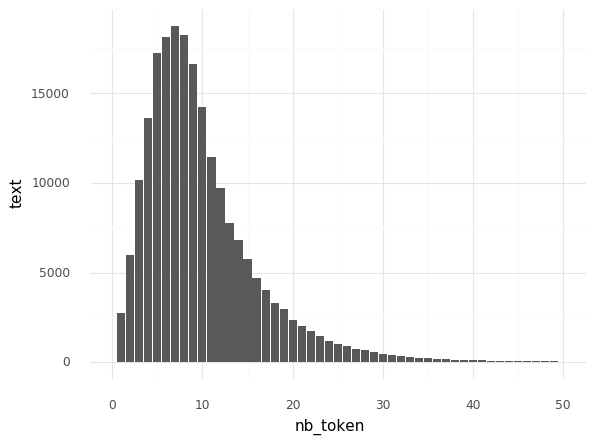

<ggplot: (-9223372036541064006)>

In [24]:
dup_agg = dup_df[['nb_token','text']].groupby('nb_token').count().reset_index()
g = (ggplot(dup_agg, aes(x='nb_token',y='text')) + geom_col() + 
     theme_minimal()+ coord_cartesian(xlim=[0,50]))
g

In [32]:
dup_df[dup_df.nb_token<2]

,text_lower,nb_token,text,conversation_type
0,310-555-9023.,1,310-555-9023.,4
1,614-585-9978,1,614-585-9978,1
2,937-888-5855,1,937-888-5855,1
24,asap.,1,ASAP.,1
30,correct,1,Correct,1
43,fine,1,Fine,1
47,gary.,1,Gary.,1
51,great,1,great,1
136,medium.,1,Medium.,1
155,ok,1,Ok,1


In [37]:
export_df = dup_df[dup_df.nb_token>2][['text']].reset_index(drop=True)
export_df

,text
0,A Japanese restaurant.
1,A large Coke. That's it.
2,a later day is available sir
3,A local place would be nice
4,"An artichoke, spinach and mushroom pizza with..."
5,And address where we can reach you?
6,And for what day?
7,And how much will it cost?
8,and i want to see it in black and white
9,And the name on the reservation?


In [42]:
from fuzzywuzzy import fuzz

In [54]:
%time fuzz.ratio('$369 is the total.', '$4.50 is the total.')

CPU times: user 27 µs, sys: 1 µs, total: 28 µs
Wall time: 32.9 µs


81

In [80]:
text_id = 0
dfs = []
n = export_df.shape[0]
for i in tqdm_notebook(range(n)):
    t1=export_df.text[i]
    dfs.append({'text_id':text_id,'text':t1})
    for j in range(i+1,n):
        t2=export_df.text[j]
        if fuzz.ratio(t1,t2)>70:
            dfs.append({'text_id':i,'text':t2})
    text_id+=1

KeyboardInterrupt: 

In [81]:
fuzzy_export = pd.DataFrame(dfs)
fuzzy_export.shape, export_df.shape

((2666, 2), (199936, 1))

In [82]:
fuzzy_export

,text,text_id
0,A Japanese restaurant.,0
1,All take this restaurant.,0
2,an Italian restaurant.,0
3,Are there any Japanese restaurants?,0
4,At a restaurant.,0
5,Find Chinese restaurant.,0
6,I need a restaurant.,0
7,It's a Chinese restaurant.,0
8,Suggest me a Japanese Restaurant,0
9,to a restaurant.,0
